## Setup and Cleaning Data

In [170]:
#importing libraries 
import pandas as pd
import matplotlib.pyplot as plt

#loading data from URL
data_url = "https://raw.githubusercontent.com/AlexanderWelsh/CVD-Project-/main/medical_examination.csv"
med_data = pd.read_csv(data_url)

#Cleaning data
#The Ages are listed in days and need to be changed to years for graphing simplicity 
med_data['Ages in Years'] = (med_data['age'] / 365.25).round()
med_data.to_csv('your_file.csv', index=False)
#Removing the decimal point from the end of the values
med_data['Ages in Years'] = med_data['Ages in Years'].apply(lambda x: int(x) if pd.notnull(x) else x)

#The values of the gender data range from 1 to 3 with 3 being unknown or other. To simplify the data all entries with gender 3 are removed
med_data = med_data[med_data['gender'] != 3]

#There are outliers with both the Systolic (ap_hi) and diastolic (ap_lo) columns of blood pressure that must be removed
#After consulting a medical professional the values for the minimum and maximum ap_hi and ap_lo were chosen
min_ap_hi = 50
max_ap_hi = 300
med_data = med_data[(med_data['ap_hi'] >= min_ap_hi) & (med_data['ap_hi'] <= max_ap_hi)]

min_ap_lo = 20
max_ap_lo = 300
med_data = med_data[(med_data['ap_lo'] >= min_ap_lo) & (med_data['ap_lo'] <= max_ap_lo)]

## Visualising CVD by Age

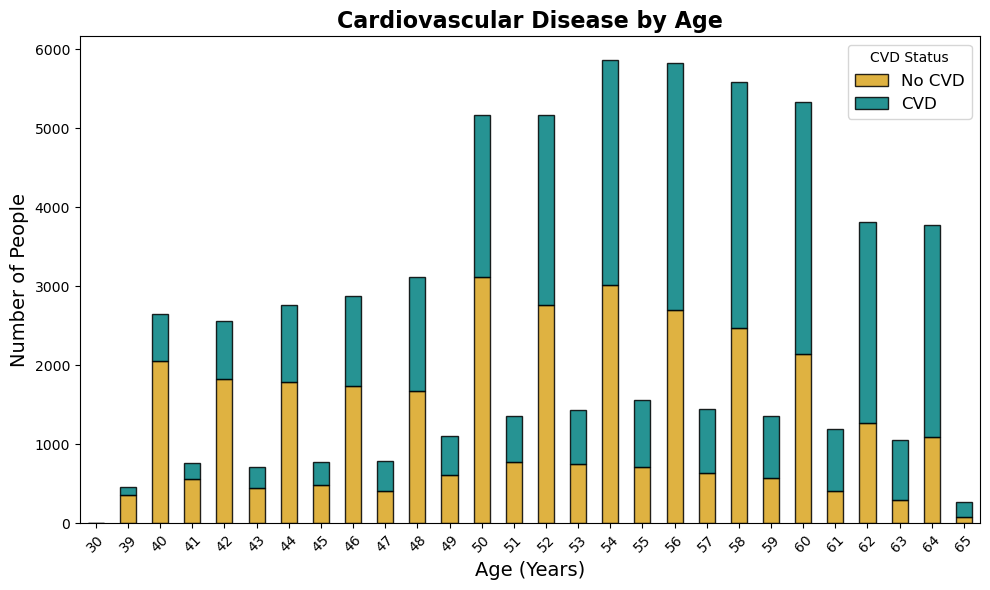

In [173]:
# Visualising the data with a Stacked Bar Chart
# Grouping the data by 'Ages in Years' and 'cardio'
age_cvd_data = med_data.groupby(['Ages in Years', 'cardio']).size().unstack(fill_value=0)

# Creating the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
age_cvd_data.plot(kind='bar', stacked=True, ax=ax, color=['goldenrod', 'teal'], edgecolor='black', alpha=0.85)

# Customizing the chart
ax.set_title('Cardiovascular Disease by Age', fontsize=16, fontweight='bold')
ax.set_xlabel('Age (Years)', fontsize=14)
ax.set_ylabel('Number of People', fontsize=14)
ax.legend(['No CVD', 'CVD'], title='CVD Status', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.bone()
plt.tight_layout()
plt.show()

## Is the data significant and is CVD more prevalent in older or younger people?

In [176]:
# The graph shows that the data has many more points leaning toward higher ages, which makes it harder to determine who has CVD.
# We will use a t-test (ttest_ind from scipy.stats) to mathematically prove if the age is significant and if older or younger people are more likely to have CVD.

from scipy.stats import ttest_ind

# Separateing age data into groups of CVD and no CVD
ages_with_cvd = med_data[med_data['cardio'] == 1]['Ages in Years']
ages_without_cvd = med_data[med_data['cardio'] == 0]['Ages in Years']

# Performing the t-test
t_stat, p_value = ttest_ind(ages_with_cvd, ages_without_cvd, equal_var=False)
print(f"T-Statistic: {t_stat}, p-value: {p_value}\n")

#Describing the outcome of the t-test
if p_value < 0.05:
    print("There is a significant difference in age between people with and without CVD.")
    if ages_with_cvd.median() > ages_without_cvd.median():
        print("A person with CVD is more likely to be older.")
    else:
        print("A person with CVD is more likely to be younger.")
else:
    print("There is no significant difference in age between people with and without CVD.")

T-Statistic: 64.63378724998816, p-value: 0.0

There is a significant difference in age between people with and without CVD.
A person with CVD is more likely to be older.


## Visualising CVD by Gender

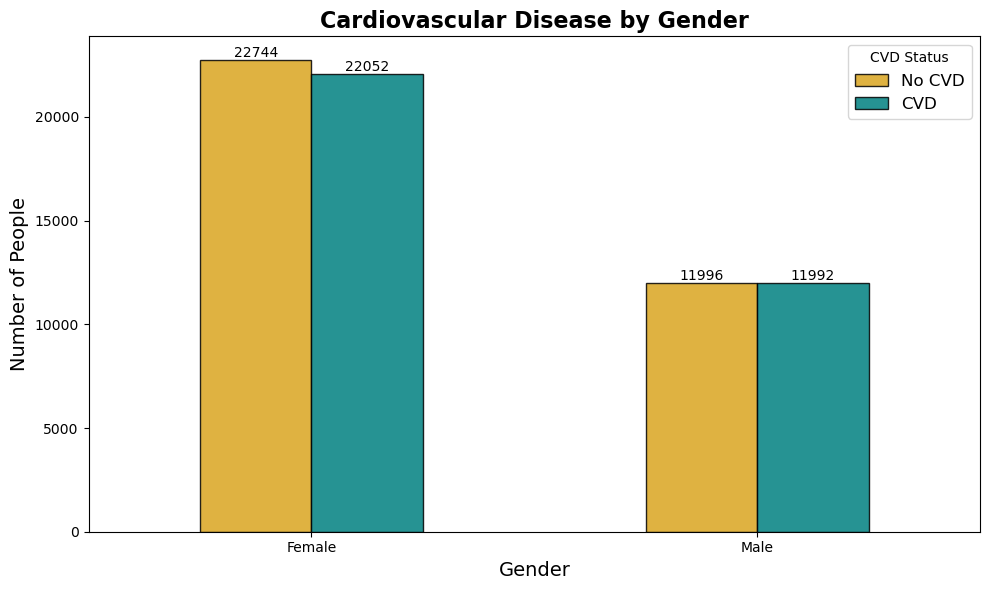

In [179]:
# Visualising the data with a grouped bar plot
# Grouping the data by 'gender' and 'cardio'
age_cvd_data = med_data.groupby(['gender', 'cardio']).size().unstack(fill_value=0)

# Creating the grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))
age_cvd_data.plot(kind='bar', ax=ax, color=['goldenrod', 'teal'], edgecolor='black', alpha=0.85)

for bar in ax.patches:
    bar_height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, bar_height + 0.5,
            f'{int(bar_height)}', ha='center', va='bottom', fontsize=10)

# Customizing the chart
ax.set_title('Cardiovascular Disease by Gender', fontsize=16, fontweight='bold')
ax.set_xlabel('Gender', fontsize=14)
ax.set_ylabel('Number of People', fontsize=14)
ax.legend(['No CVD', 'CVD'], title='CVD Status', fontsize=12)
ax.set_xticklabels(['Female', 'Male'], fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.bone()
plt.tight_layout()
plt.show()

## Is the data significant and is CVD more prevalent in Women or Men?

In [433]:
# The graph is fairly even but on the men's side and slightly higher toward females having and increased risk of cvd.
# We will use a t-test (ttest_ind from scipy.stats) to mathematically prove if gender is significant and if women or men are more likely to have CVD.

# Separateing gender data into groups of CVD and no CVD
genders_with_cvd = med_data[med_data['cardio'] == 1]['gender']
genders_without_cvd = med_data[med_data['cardio'] == 0]['gender']

# Performing the t-test
t_stat, p_value = ttest_ind(genders_with_cvd, genders_without_cvd, equal_var=False)
print(f"T-Statistic: {t_stat}, p-value: {p_value}\n")

#Describing the outcome of the t-test
if p_value < 0.05:
    print("There is a significant difference in gender between people with and without CVD.")
    if genders_with_cvd.median() > genders_without_cvd.median():
        print("Women are more likely to have CVD.")
    else:
        print("Men are more likely to have CVD.")
else:
    print("There is no significant difference gender between people with and without CVD.")

T-Statistic: 1.9100004398863804, p-value: 0.05613731396155514

There is no significant difference gender between people with and without CVD.


## Visualising CVD by Height

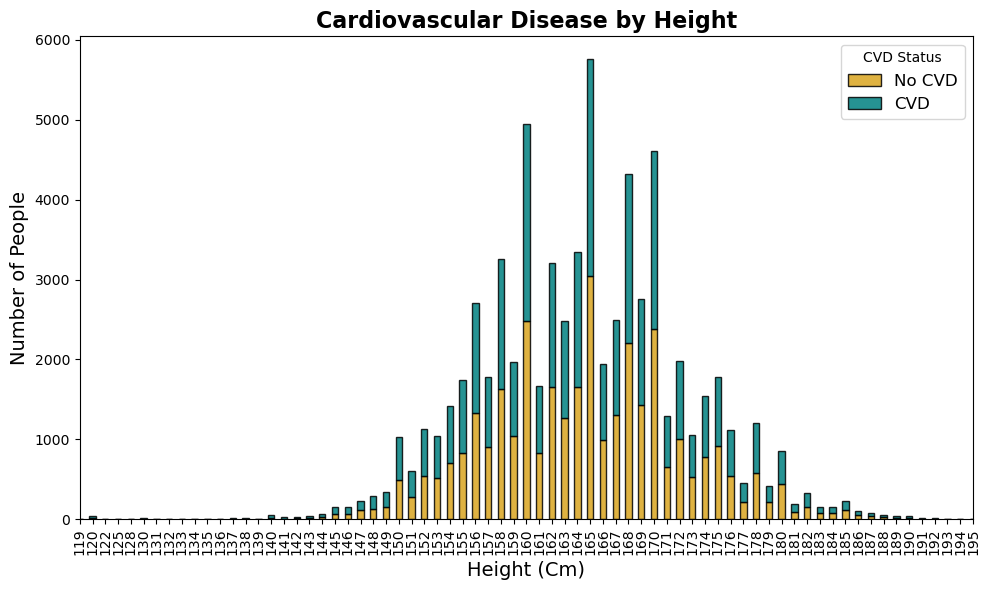

In [184]:
# Visualising the data with a grouped bar plot
# Grouping the data by 'height' and 'cardio'
height_cvd_data = med_data.groupby(['height', 'cardio']).size().unstack(fill_value=0)

# Creating the grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))
height_cvd_data.plot(kind='bar', stacked=True, ax=ax, color=['goldenrod', 'teal'], edgecolor='black', alpha=0.85)

# Customizing the chart
ax.set_title('Cardiovascular Disease by Height', fontsize=16, fontweight='bold')
ax.set_xlabel('Height (Cm)', fontsize=14)
ax.set_ylabel('Number of People', fontsize=14)
ax.legend(['No CVD', 'CVD'], title='CVD Status', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.xlim(30, 100)
plt.bone()
plt.tight_layout()
plt.show()

## Is the data significant and is CVD more prevalent in shorter or taller people?

In [185]:
# The graph has many data points making it very hard to see any patterns in it, making it harder to determine if CVD is prevalent.
# We will use a t-test (ttest_ind from scipy.stats) to mathematically prove if height is significant and if shorter or taller people are more likely to have CVD.

# Separateing height data into groups of CVD and no CVD
height_with_cvd = med_data[med_data['cardio'] == 1]['height']
height_without_cvd = med_data[med_data['cardio'] == 0]['height']

# Performing the t-test
t_stat, p_value = ttest_ind(height_with_cvd, height_without_cvd, equal_var=False)
print(f"T-Statistic: {t_stat}, p-value: {p_value}\n")

#Describing the outcome of the t-test
if p_value < 0.05:
    print("There is a significant difference in height between people with and without CVD.")
    if height_with_cvd.median() > height_without_cvd.median():
        print("A person with CVD is more likely to be shorter.")
    else:
        print("A person with CVD is more likely to be taller.")
else:
    print("There is no significant difference in height between people with and without CVD.")

T-Statistic: -2.831502671449459, p-value: 0.0046343308330270404

There is a significant difference in height between people with and without CVD.
Shorter people are more likely to have CVD.


## Visualising CVD by Weight

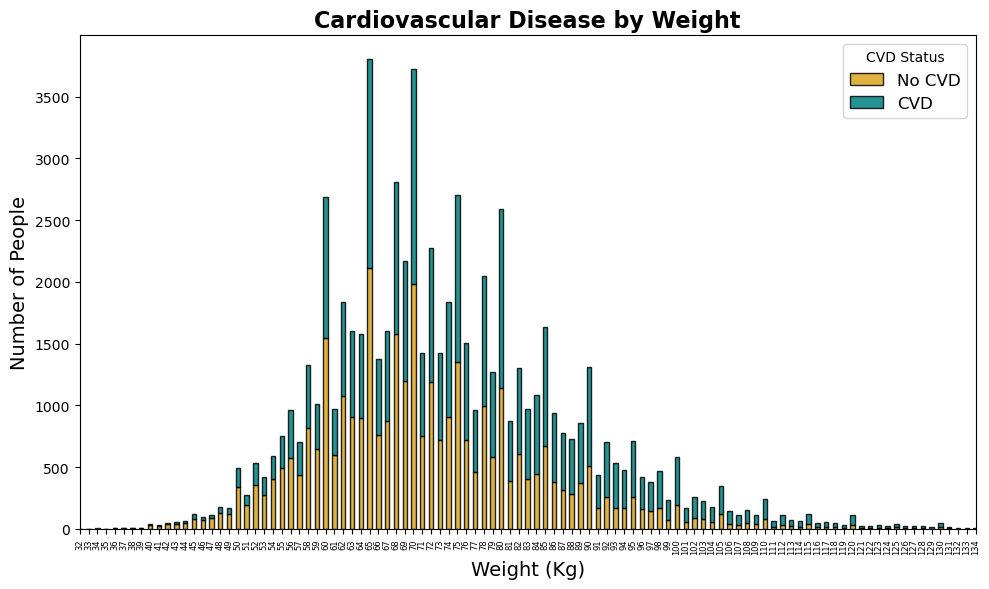

In [248]:
# Visualising the data with a grouped bar plot
# Grouping the data by 'weight' and 'cardio'
med_data['rounded_weight'] = med_data['weight'].round()
weight_cvd_data = med_data.groupby(['rounded_weight', 'cardio']).size().unstack(fill_value=0)

# Creating the grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))
weight_cvd_data.plot(kind='bar', stacked=True, ax=ax, color=['goldenrod', 'teal'], edgecolor='black', alpha=0.85)

# Customizing the chart
ax.set_title('Cardiovascular Disease by Weight', fontsize=16, fontweight='bold')
ax.set_xlabel('Weight (Kg)', fontsize=14)
ax.set_ylabel('Number of People', fontsize=14)
ax.legend(['No CVD', 'CVD'], title='CVD Status', fontsize=12)
ax.set_xticklabels([int(label) for label in weight_cvd_data.index], rotation=90)
plt.xlim(8, 110)
plt.xticks(rotation=90, fontsize=6)
plt.bone()
plt.tight_layout()
plt.show()

## Is the data significant and is CVD more prevalent in lighter or heavier people?

In [252]:
# The graph has many data points making it very hard to see any patterns in it, making it harder to determine if CVD is prevalent.
# We will use a t-test (ttest_ind from scipy.stats) to mathematically prove if weight is significant and if lighter or heavier people are more likely to have CVD.

# Separateing height data into groups of CVD and no CVD
weight_with_cvd = med_data[med_data['cardio'] == 1]['weight']
weight_without_cvd = med_data[med_data['cardio'] == 0]['weight']

# Performing the t-test
t_stat, p_value = ttest_ind(weight_with_cvd, weight_without_cvd, equal_var=False)
print(f"T-Statistic: {t_stat}, p-value: {p_value}\n")

#Describing the outcome of the t-test
if p_value < 0.05:
    print("There is a significant difference in height between people with and without CVD.")
    if weight_with_cvd.median() > weight_without_cvd.median():
        print("A person with CVD is more likely to be lighter.")
    else:
        print("A person with CVD is more likely to be heavier.")
else:
    print("There is no significant difference in height between people with and without CVD.")

T-Statistic: 47.84248067003631, p-value: 0.0

There is a significant difference in height between people with and without CVD.
A person with CVD is more likely to be lighter.


## Visualising CVD by Systolic Blood Pressure

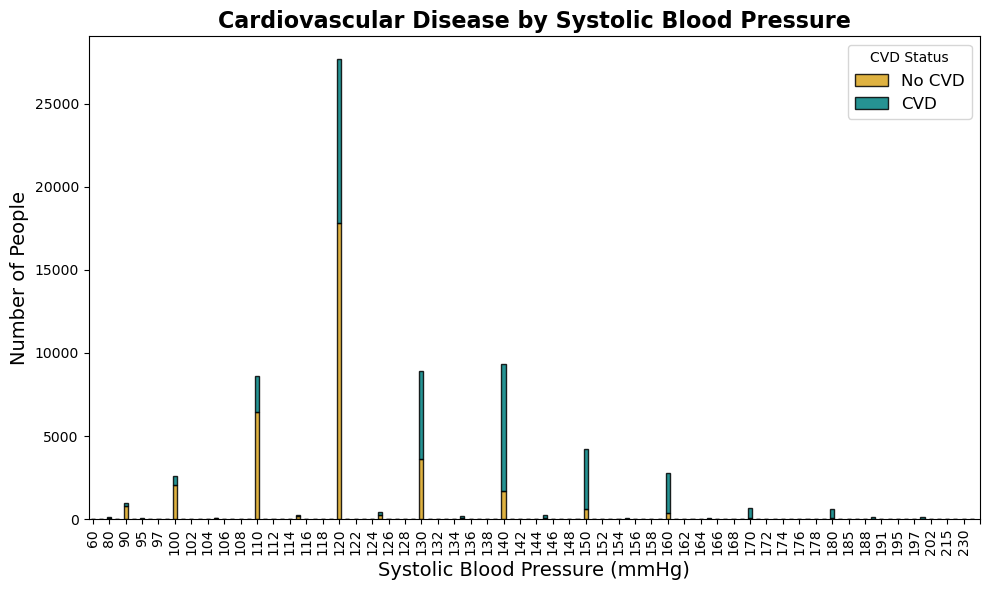

In [290]:
# Visualising the data with a Stacked Bar Chart
# Grouping the data by 'ap_hi' and 'cardio'

#importing numpy for plt.xticks(np.arange()) which fixes the issue of large spaces between each bar
import numpy as np

systolic_cvd_data = med_data.groupby(['ap_hi', 'cardio']).size().unstack(fill_value=0)

# Creating the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
systolic_cvd_data.plot(kind='bar', stacked=True, ax=ax, color=['goldenrod', 'teal'], edgecolor='black', alpha=0.85)

# Customizing the chart
ax.set_title('Cardiovascular Disease by Systolic Blood Pressure', fontsize=16, fontweight='bold')
ax.set_xlabel('Systolic Blood Pressure (mmHg)', fontsize=14)
ax.set_ylabel('Number of People', fontsize=14)
ax.legend(['No CVD', 'CVD'], title='CVD Status', fontsize=12)
plt.xticks(np.arange(0, 110, 2), rotation=90, fontsize=10)
plt.bone()
plt.tight_layout()
plt.show()

## Is the data significant and is CVD more prevalent in people with low or high systolic blood pressure?

In [296]:
# The graph has many data points making it very hard to see any patterns in it, making it harder to determine if CVD is prevalent.
# We will use a t-test (ttest_ind from scipy.stats) to mathematically prove if systolic blood pressure is significant and if someone with low or high systolic blood pressure is more likely to have CVD.

# Separateing systolic blood pressure data into groups of CVD and no CVD
systolic_with_cvd = med_data[med_data['cardio'] == 1]['ap_hi']
systolic_without_cvd = med_data[med_data['cardio'] == 0]['ap_hi']

# Performing the t-test
t_stat, p_value = ttest_ind(systolic_with_cvd, systolic_without_cvd, equal_var=False)
print(f"T-Statistic: {t_stat}, p-value: {p_value}\n")

#Describing the outcome of the t-test
if p_value < 0.05:
    print("There is a significant difference in systolic blood pressure between people with and without CVD.")
    if systolic_with_cvd.median() > systolic_without_cvd.median():
        print("A person with CVD is more likely to have low systolic blood pressure.")
    else:
        print("A person with CVD is more likely to have high systolic blood pressure.")
else:
    print("There is no significant difference in systolic blood pressure between people with and without CVD.")

T-Statistic: 122.76269363260454, p-value: 0.0

There is a significant difference in systolic blood pressure between people with and without CVD.
A person with CVD is more likely to have low systolic blood pressure.


## Visualising CVD by Diastolic Blood Pressure

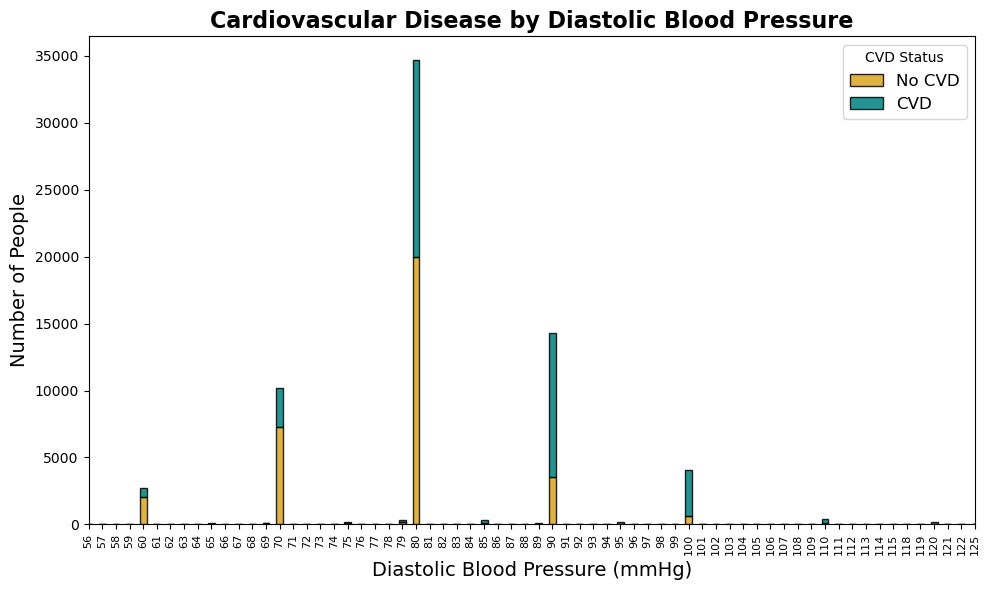

In [337]:
# Visualising the data with a Stacked Bar Chart
# Grouping the data by 'ap_lo' and 'cardio'

diastolic_cvd_data = med_data.groupby(['ap_lo', 'cardio']).size().unstack(fill_value=0)

# Creating the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
diastolic_cvd_data.plot(kind='bar', stacked=True, ax=ax, color=['goldenrod', 'teal'], edgecolor='black', alpha=0.85)

# Customizing the chart
ax.set_title('Cardiovascular Disease by Diastolic Blood Pressure', fontsize=16, fontweight='bold')
ax.set_xlabel('Diastolic Blood Pressure (mmHg)', fontsize=14)
ax.set_ylabel('Number of People', fontsize=14)
ax.legend(['No CVD', 'CVD'], title='CVD Status', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.xlim(10, 75)
plt.bone()
plt.tight_layout()
plt.show()

## Is the data significant and is CVD more prevalent in people with low or high diastolic blood pressure?

In [362]:
# The graph has only a few data points in it, many of which are small counts, making it difficult to see any patterns in it and determine if CVD is prevalent.
# We will use a t-test (ttest_ind from scipy.stats) to mathematically prove if diastolic blood pressure is significant and if someone with low or high diastolic blood pressure is more likely to have CVD.

# Separateing diastolic blood pressure data into groups of CVD and no CVD
diastolic_with_cvd = med_data[med_data['cardio'] == 1]['ap_lo']
diastolic_without_cvd = med_data[med_data['cardio'] == 0]['ap_lo']

# Performing the t-test
t_stat, p_value = ttest_ind(diastolic_with_cvd, diastolic_without_cvd, equal_var=False)
print(f"T-Statistic: {t_stat}, p-value: {p_value}\n")

#Describing the outcome of the t-test
if p_value < 0.05:
    print("There is a significant difference in diastolic blood pressure between people with and without CVD.")
    if diastolic_with_cvd.median() > diastolic_without_cvd.median():
        print("A person with CVD is more likely to have low diastolic blood pressure.")
    else:
        print("A person with CVD is more likely to have high diastolic blood pressure.")
else:
    print("There is no significant difference in diastolic blood pressure between people with and without CVD.")

T-Statistic: 92.45462457857414, p-value: 0.0

There is a significant difference in diastolic blood pressure between people with and without CVD.
A person with CVD is more likely to have high diastolic blood pressure.


## Visualising CVD by Cholesterol

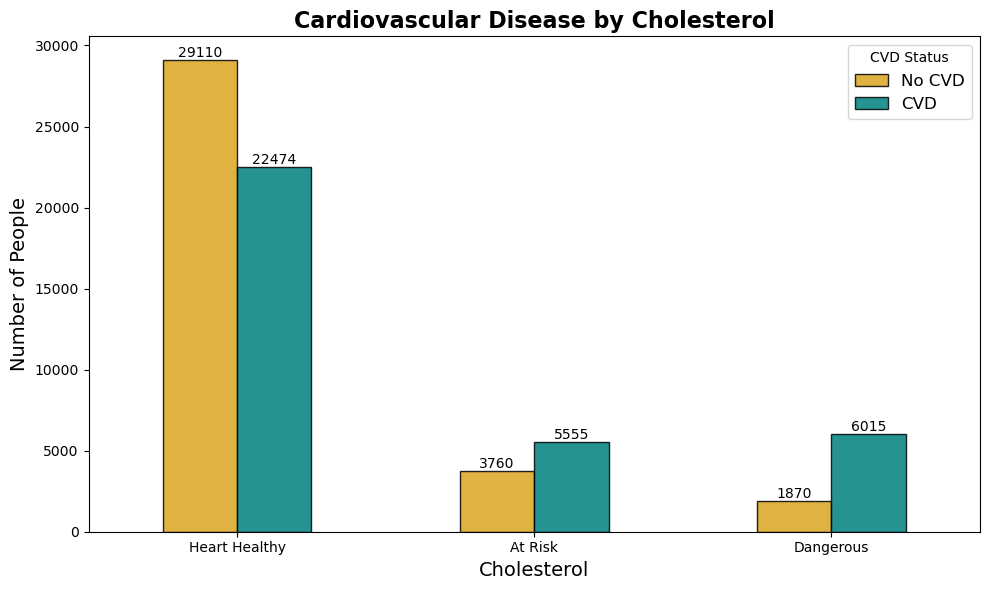

In [364]:
# Visualising the data with a grouped bar plot
# Grouping the data by 'cholesterol' and 'cardio'
cholesterol_cvd_data = med_data.groupby(['cholesterol', 'cardio']).size().unstack(fill_value=0)

# Creating the grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))
cholesterol_cvd_data.plot(kind='bar', ax=ax, color=['goldenrod', 'teal'], edgecolor='black', alpha=0.85)

for bar in ax.patches:
    bar_height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, bar_height + 0.5,
            f'{int(bar_height)}', ha='center', va='bottom', fontsize=10)

# Customizing the chart
ax.set_title('Cardiovascular Disease by Cholesterol', fontsize=16, fontweight='bold')
ax.set_xlabel('Cholesterol', fontsize=14)
ax.set_ylabel('Number of People', fontsize=14)
ax.legend(['No CVD', 'CVD'], title='CVD Status', fontsize=12)
ax.set_xticklabels(['Heart Healthy', 'At Risk', 'Dangerous'], fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.bone()
plt.tight_layout()
plt.show()

## Is the data significant and is CVD more prevalent in people with lower or higher Cholesterol?

In [368]:
# The graph has only a few data points in it, many of which are small counts, making it difficult to see any patterns in it and determine if CVD is prevalent.
# We will use a t-test (ttest_ind from scipy.stats) to mathematically prove if cholesterol is significant and if someone with lower or higher cholesterol is more likely to have CVD.

#It's important to note that the original data only states the x values as 1, 2, or 3 with no more elaboration. The x labels "Heart Healthy", "At Risk", and "Dangerous" are created as assumptions.

# Separateing cholesterol data into groups of CVD and no CVD
cholesterol_with_cvd = med_data[med_data['cardio'] == 1]['ap_lo']
cholesterol_without_cvd = med_data[med_data['cardio'] == 0]['ap_lo']

# Performing the t-test
t_stat, p_value = ttest_ind(cholesterol_with_cvd, cholesterol_without_cvd, equal_var=False)
print(f"T-Statistic: {t_stat}, p-value: {p_value}\n")

#Describing the outcome of the t-test
if p_value < 0.05:
    print("There is a significant difference in cholesterol between people with and without CVD.")
    if cholesterol_with_cvd.median() > cholesterol_without_cvd.median():
        print("A person with CVD is more likely to have low cholesterol.")
    else:
        print("A person with CVD is more likely to have high cholesterol.")
else:
    print("There is no significant difference in cholesterol between people with and without CVD.")

T-Statistic: 92.45462457857414, p-value: 0.0

There is a significant difference in cholesterol between people with and without CVD.
A person with CVD is more likely to have high cholesterol.


## Visualising CVD by Glucose

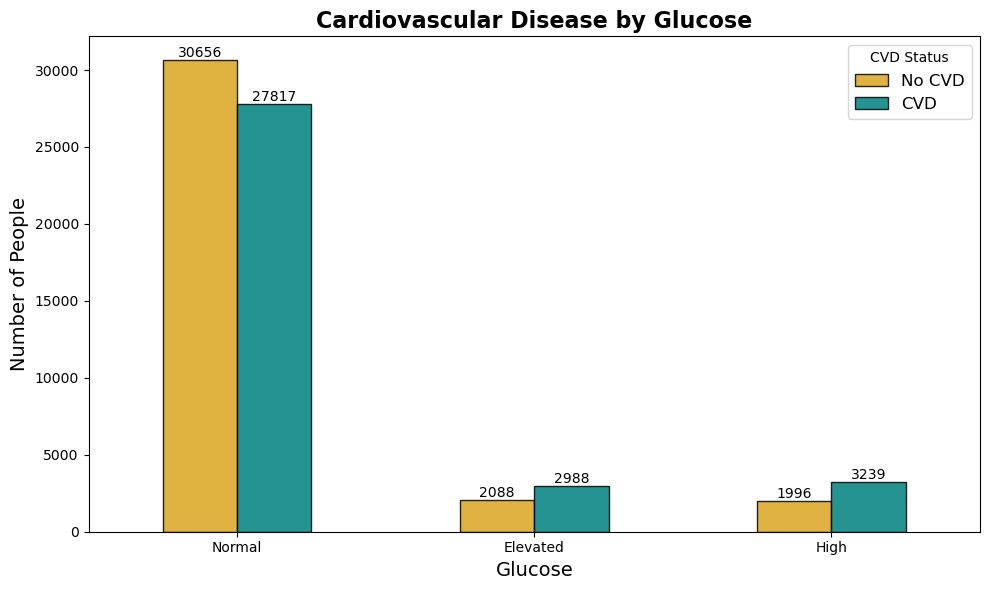

In [381]:
# Visualising the data with a grouped bar plot
# Grouping the data by 'gluc' and 'cardio'
glucose_cvd_data = med_data.groupby(['gluc', 'cardio']).size().unstack(fill_value=0)

# Creating the grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))
glucose_cvd_data.plot(kind='bar', ax=ax, color=['goldenrod', 'teal'], edgecolor='black', alpha=0.85)

for bar in ax.patches:
    bar_height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, bar_height + 0.5,
            f'{int(bar_height)}', ha='center', va='bottom', fontsize=10)

# Customizing the chart
ax.set_title('Cardiovascular Disease by Glucose', fontsize=16, fontweight='bold')
ax.set_xlabel('Glucose', fontsize=14)
ax.set_ylabel('Number of People', fontsize=14)
ax.legend(['No CVD', 'CVD'], title='CVD Status', fontsize=12)
ax.set_xticklabels(['Normal', 'Elevated', 'High'], fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.bone()
plt.tight_layout()
plt.show()

## Is the data significant and is CVD more prevalent in people with lower or higher Glucose?

In [386]:
# The graph clearly shows that CVD is more prevalent in people with elevated or high glucose levels.
# We will use a t-test (ttest_ind from scipy.stats) to mathematically prove if glucose is significant and if someone with lower or higher glucose is more likely to have CVD.

#It's important to note that the original data only states the x values as 1, 2, or 3 with no more elaboration. The x labels "Normal", "Elevated", and "High" are created as assumptions.

# Separateing glucose data into groups of CVD and no CVD
glucose_with_cvd = med_data[med_data['cardio'] == 1]['gluc']
glucose_without_cvd = med_data[med_data['cardio'] == 0]['gluc']

# Performing the t-test
t_stat, p_value = ttest_ind(glucose_with_cvd, glucose_without_cvd, equal_var=False)
print(f"T-Statistic: {t_stat}, p-value: {p_value}\n")

#Describing the outcome of the t-test
if p_value < 0.05:
    print("There is a significant difference in glucose between people with and without CVD.")
    if glucose_with_cvd.median() > glucose_without_cvd.median():
        print("A person with CVD is more likely to have low glucose.")
    else:
        print("A person with CVD is more likely to have high glucose.")
else:
    print("There is no significant difference in glucose between people with and without CVD.")

T-Statistic: 23.669460385717635, p-value: 2.4577466460522086e-123

There is a significant difference in glucose between people with and without CVD.
A person with CVD is more likely to have high glucose.


## Visualising CVD by Smoking

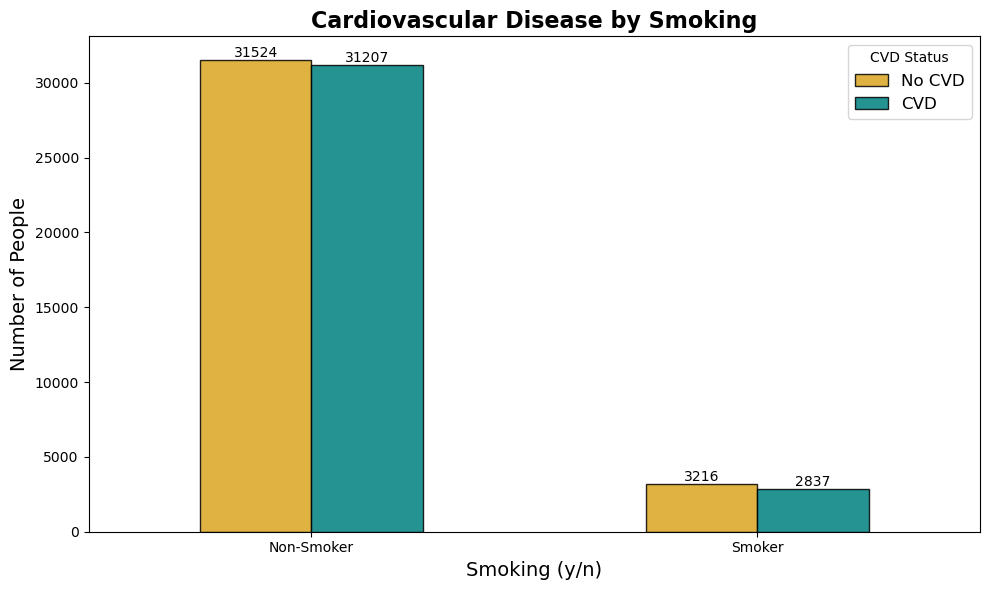

In [392]:
# Visualising the data with a grouped bar plot
# Grouping the data by 'smoke' and 'cardio'
smoke_cvd_data = med_data.groupby(['smoke', 'cardio']).size().unstack(fill_value=0)

# Creating the grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))
smoke_cvd_data.plot(kind='bar', ax=ax, color=['goldenrod', 'teal'], edgecolor='black', alpha=0.85)

for bar in ax.patches:
    bar_height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, bar_height + 0.5,
            f'{int(bar_height)}', ha='center', va='bottom', fontsize=10)

# Customizing the chart
ax.set_title('Cardiovascular Disease by Smoking', fontsize=16, fontweight='bold')
ax.set_xlabel('Smoking (y/n)', fontsize=14)
ax.set_ylabel('Number of People', fontsize=14)
ax.legend(['No CVD', 'CVD'], title='CVD Status', fontsize=12)
ax.set_xticklabels(['Non-Smoker', 'Smoker'], fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.bone()
plt.tight_layout()
plt.show()

## Is the data significant and is CVD more prevalent in people who do or dont smoke?

In [410]:
# The graph clearly shows that CVD is more prevalent in people who do or don't smoke.
# We will use a t-test (ttest_ind from scipy.stats) to mathematically prove if smoking is significant and if someone who is a smoker or nonsmoker is more likely to have CVD.

# Separateing smoking data into groups of CVD and no CVD
smoke_with_cvd = med_data[med_data['cardio'] == 1]['smoke']
smoke_without_cvd = med_data[med_data['cardio'] == 0]['smoke']

# Performing the t-test
t_stat, p_value = ttest_ind(smoke_with_cvd, smoke_without_cvd, equal_var=False)
print(f"T-Statistic: {t_stat}, p-value: {p_value}\n")

#Describing the outcome of the t-test
if p_value < 0.05:
    print("There is a significant difference in smoking habbits between people with and without CVD.")
    if smoke_with_cvd.median() > smoke_without_cvd.median():
        print("A person with CVD is more likely to not smoke.")
    else:
        print("A person with CVD is more likely to smoke.")
else:
    print("There is no significant difference in smoking habbits between people with and without CVD.")

T-Statistic: -4.27944804258548, p-value: 1.876105504085411e-05

There is a significant difference in smoking habbits between people with and without CVD.
A person with CVD is more likely to smoke.


## Visualising CVD by Alcohol Consumption

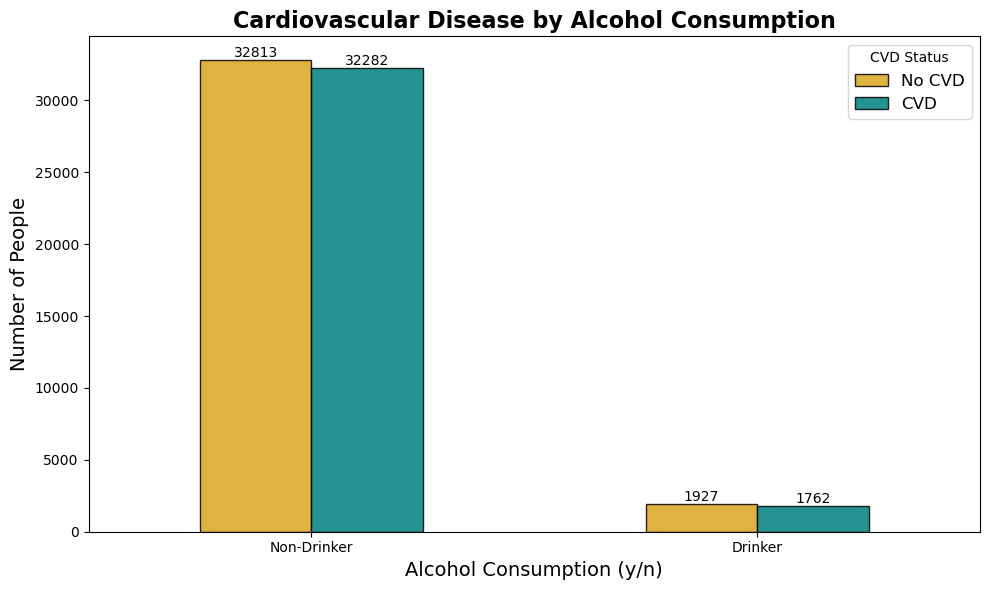

In [429]:
# Visualising the data with a grouped bar plot
# Grouping the data by 'alco' and 'cardio'
alcohol_cvd_data = med_data.groupby(['alco', 'cardio']).size().unstack(fill_value=0)

# Creating the grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))
alcohol_cvd_data.plot(kind='bar', ax=ax, color=['goldenrod', 'teal'], edgecolor='black', alpha=0.85)

for bar in ax.patches:
    bar_height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, bar_height + 0.5,
            f'{int(bar_height)}', ha='center', va='bottom', fontsize=10)

# Customizing the chart
ax.set_title('Cardiovascular Disease by Alcohol Consumption', fontsize=16, fontweight='bold')
ax.set_xlabel('Alcohol Consumption (y/n)', fontsize=14)
ax.set_ylabel('Number of People', fontsize=14)
ax.legend(['No CVD', 'CVD'], title='CVD Status', fontsize=12)
ax.set_xticklabels(['Non-Drinker', 'Drinker'], fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.bone()
plt.tight_layout()
plt.show()

## Is the data significant and is CVD more prevalent in people who do or dont consume alcohol?

In [416]:
# The graph clearly shows that CVD is more prevalent in people who do or don't consume alcohol.
# We will use a t-test (ttest_ind from scipy.stats) to mathematically prove if smoking is significant and if someone who is a smoker or nonsmoker is more likely to have CVD.

# Separateing alcohol consumption data into groups of CVD and no CVD
alcohol_with_cvd = med_data[med_data['cardio'] == 1]['alco']
alcohol_without_cvd = med_data[med_data['cardio'] == 0]['alco']

# Performing the t-test
t_stat, p_value = ttest_ind(alcohol_with_cvd, alcohol_without_cvd, equal_var=False)
print(f"T-Statistic: {t_stat}, p-value: {p_value}\n")

#Describing the outcome of the t-test
if p_value < 0.05:
    print("There is a significant difference in drinking habbits between people with and without CVD.")
    if alcohol_with_cvd.median() > alcohol_without_cvd.median():
        print("A person with CVD is more likely to not consume alcohol.")
    else:
        print("A person with CVD is more likely to consume alcohol.")
else:
    print("There is no significant difference in drinking habbits between people with and without CVD.")

T-Statistic: -2.1616565126920437, p-value: 0.030648100583587717

There is a significant difference in drinking habbits between people with and without CVD.
A person with CVD is more likely to consume alcohol.


## Visualising CVD by Physical Activity

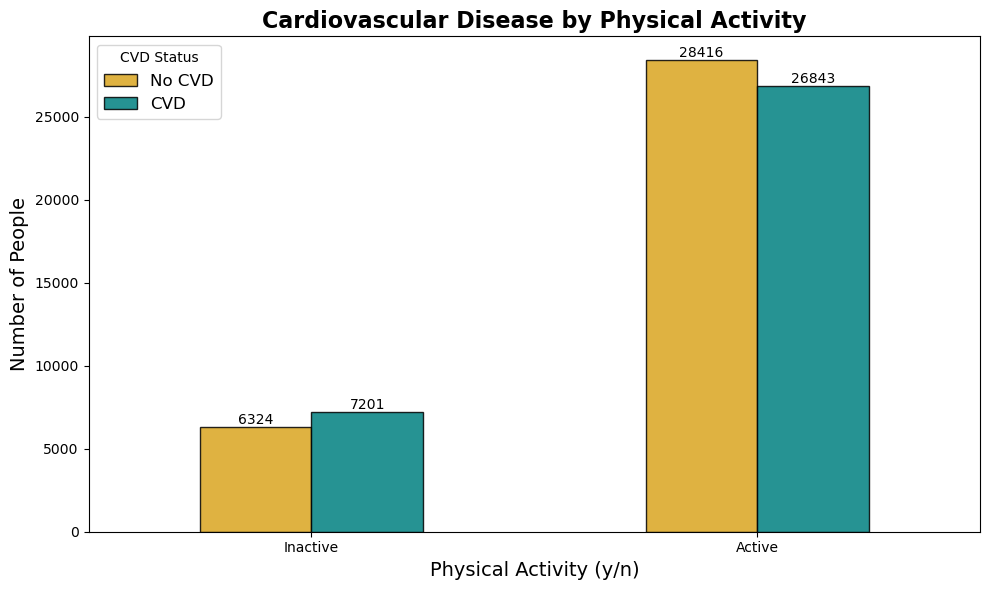

In [425]:
# Visualising the data with a grouped bar plot
# Grouping the data by 'active' and 'cardio'
activity_cvd_data = med_data.groupby(['active', 'cardio']).size().unstack(fill_value=0)

# Creating the grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))
activity_cvd_data.plot(kind='bar', ax=ax, color=['goldenrod', 'teal'], edgecolor='black', alpha=0.85)

for bar in ax.patches:
    bar_height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, bar_height + 0.5,
            f'{int(bar_height)}', ha='center', va='bottom', fontsize=10)

# Customizing the chart
ax.set_title('Cardiovascular Disease by Physical Activity', fontsize=16, fontweight='bold')
ax.set_xlabel('Physical Activity (y/n)', fontsize=14)
ax.set_ylabel('Number of People', fontsize=14)
ax.legend(['No CVD', 'CVD'], title='CVD Status', fontsize=12)
ax.set_xticklabels(['Inactive', 'Active'], fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.bone()
plt.tight_layout()
plt.show()

## Is the data significant and is CVD more prevalent in people who are or are not physicaly active?

In [431]:
# The graph clearly shows that CVD is more prevalent in people who are not physically active.
# We will use a t-test (ttest_ind from scipy.stats) to mathematically prove if physical activity is significant and if someone who is physically active or sedentary is more likely to have CVD.

# Separateing activity data into groups of CVD and no CVD
activity_with_cvd = med_data[med_data['cardio'] == 1]['alco']
activity_without_cvd = med_data[med_data['cardio'] == 0]['alco']

# Performing the t-test
t_stat, p_value = ttest_ind(activity_with_cvd, activity_without_cvd, equal_var=False)
print(f"T-Statistic: {t_stat}, p-value: {p_value}\n")

#Describing the outcome of the t-test
if p_value < 0.05:
    print("There is a significant difference in activity between people with and without CVD.")
    if activity_with_cvd.median() > activity_without_cvd.median():
        print("A person with CVD is more likely to be inactive.")
    else:
        print("A person with CVD is more likely to be active.")
else:
    print("There is no significant difference in activity between people with and without CVD.")

T-Statistic: -2.1616565126920437, p-value: 0.030648100583587717

There is a significant difference in activity between people with and without CVD.
A person with CVD is more likely to be active.
